# Interact with lerepi
This notebook serves as starting point on how to interact with D.lensalot interactively, i.e. Jobs are loaded and all D.lensalot object are accessible

# Header

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from lenscarf.run import run
fn = '/pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut5/s91.py'
interactive = run(config=fn, job_id='MAP_lensrec', verbose=False).job

could not setup healpix hack. reverting to standard healpy
MSC: using scarf with 1 OMP threads


## Now you have full access to all D.lensalot objects 

In [2]:
interactive.__dict__

{'dlm_mod_bool': False,
 'temp_suffix': 'highcut5',
 'TEMP': '/pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut5',
 'overwrite_libdir': None,
 'tr': 16,
 'version': 'noMF',
 'k': 'p_p',
 'itmax': 10,
 'simidxs_mf': array([], dtype=int64),
 'Nmf': 0,
 'zbounds': (-1, 1),
 'zbounds_len': (-1, 1),
 'pb_ctr': 0,
 'pb_extent': 6.283185307179586,
 'lensres': 1.7,
 'Lmin': 2,
 'lmax_filt': 2048,
 'lmax_ivf': 2000,
 'lmin_ivf': 2,
 'mmax_ivf': 2000,
 'mmin_ivf': 2,
 'lmax_unl': 2500,
 'mmax_unl': 2500,
 'nlev_t': array([0.        , 0.        , 0.        , ..., 0.33334712, 0.33301819,
        0.33269034]),
 'nlev_p': array([0.        , 0.        , 0.        , ..., 0.33334712, 0.33301819,
        0.33269034]),
 'cls_unl': {'tt': array([0.00000000e+00, 3.15384486e+03, 1.08426834e+03, ...,
         9.66229400e-10, 9.65260803e-10, 9.64292720e-10]),
  'ee': array([0.00000000e+00, 0.00000000e+00, 3.62414129e-02, ...,
         2.00006407e-12, 1.99423451e-12, 1

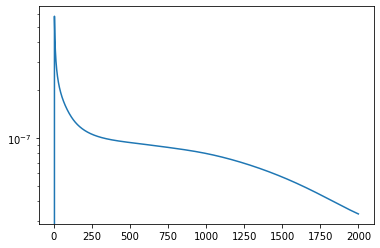

In [4]:
plt.plot(interactive.nlev_p*1e-7)
# noise_j = np.loadtxt("/pscratch/sd/s/sebibel/data/pico/noise/Clsmooth_julien.npy")
# plt.plot(noise_j)
plt.yscale('log')
# np.sqrt(val) * (60 * 180 / np.pi)

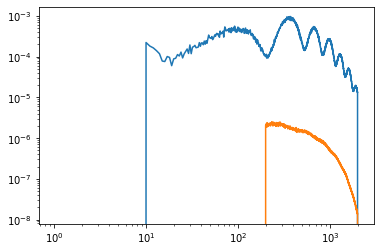

In [5]:
plt.plot(hp.alm2cl(interactive.dlensalot_model.ivfs.get_sim_emliklm(1)))
plt.plot(hp.alm2cl(interactive.dlensalot_model.ivfs.get_sim_bmliklm(1)))
plt.xscale('log')
plt.yscale('log')
# job.dlensalot_model.cinv_p

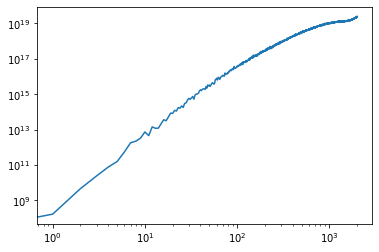

In [15]:
plt.loglog(hp.alm2cl(interactive.dlensalot_model.qlms_dd.get_sim_qlm(idx=1,k='p_p',lmax=2000)))

In [18]:
interactive.dlensalot_model.ivfs.__dict__

{'sim_lib': <lenscarf.lerepi.config.pico.data.sims_90.ILC_Matthieu_Dec21 at 0x7fbd65173bd0>,
 'ftl': array([   0.        ,    0.        ,    0.        , ..., 2765.77022687,
        2768.4065467 , 2771.04394007]),
 'fel': array([    0.        ,     0.        ,     0.        , ...,
        70440.36033527, 70909.44045343, 71383.0499347 ]),
 'fbl': array([      0.        ,       0.        ,       0.        , ...,
        1679369.74440433, 1676918.20391972, 1674462.20221407]),
 'lmax_fl': 2000,
 'transf': {'t': array([0.        , 0.        , 0.        , ..., 0.13603852, 0.13576713,
         0.13549614]),
  'e': array([0.        , 0.        , 0.        , ..., 0.13603852, 0.13576713,
         0.13549614]),
  'b': array([0.        , 0.        , 0.        , ..., 0.13603852, 0.13576713,
         0.13549614])},
 'lib_dir': '/pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut5/ivfs',
 'cl': {'tt': array([0.00000000e+00, 3.15384486e+03, 1.08437306e+03, ...,
 

In [19]:
interactive.dlensalot_model.qlms_dd.__dict__

{'lib_dir': '/pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut5/qlms_dd',
 'prefix': '/pscratch/sd/s/sebibel/dlensalot/lenscarf/sims_90/ILC_Matthieu_Dec21_91_OBDtrunc200_highcut5/qlms_dd',
 'lmax_qlm': {'T': 2500, 'P': 2500, 'PS': 2500},
 'f2map1': <plancklens.qest.lib_filt2map_sepTP at 0x7fbd6504f190>,
 'f2map2': <plancklens.qest.lib_filt2map_sepTP at 0x7fbd6504f2d0>,
 'fskies': {11: 1.0, 12: 1.0, 22: 1.0},
 'fsky11': 1.0,
 'fsky12': 1.0,
 'fsky22': 1.0,
 'resplib': None,
 'keys_fund': ['ptt',
  'xtt',
  'p_p',
  'x_p',
  'p',
  'x',
  'stt',
  's',
  'ftt',
  'f_p',
  'f',
  'dtt',
  'ntt',
  'a_p',
  'pte',
  'pet',
  'ptb',
  'pbt',
  'pee',
  'peb',
  'pbe',
  'pbb',
  'xte',
  'xet',
  'xtb',
  'xbt',
  'xee',
  'xeb',
  'xbe',
  'xbb'],
 'keys': ['ptt',
  'xtt',
  'p_p',
  'x_p',
  'p',
  'x',
  'stt',
  's',
  'ftt',
  'f_p',
  'f',
  'dtt',
  'ntt',
  'a_p',
  'pte',
  'pet',
  'ptb',
  'pbt',
  'pee',
  'peb',
  'pbe',
  'pbb',
  'xte

In [16]:
interactive.nlev_t

array([0.        , 0.        , 0.        , ..., 0.33334712, 0.33301819,
       0.33269034])